### Importation des packages

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import pytesseract
from pytesseract import Output
import os
import pandas as pd
import re

Liens intéressants :  
https://www.analyticsvidhya.com/blog/2021/06/optical-character-recognitionocr-with-tesseract-opencv-and-python/  
https://datacorner.fr/tesseract-adv/

In [3]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\INTERNET_DIGITAL\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

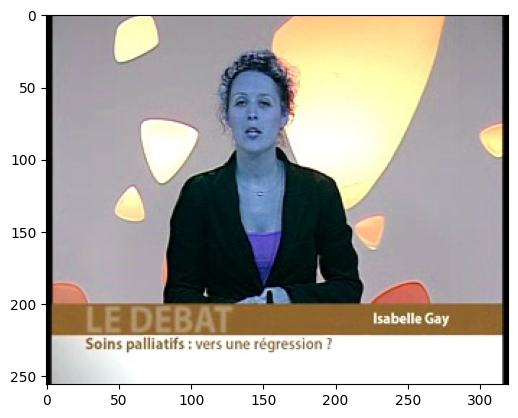

'Soins palliatifs: vers une régression\n'

In [16]:
img_test = cv2.imread('images\image176.jpg')
plt.imshow(img_test)
plt.show()
text = pytesseract.image_to_string(img_test, lang='fra')
text

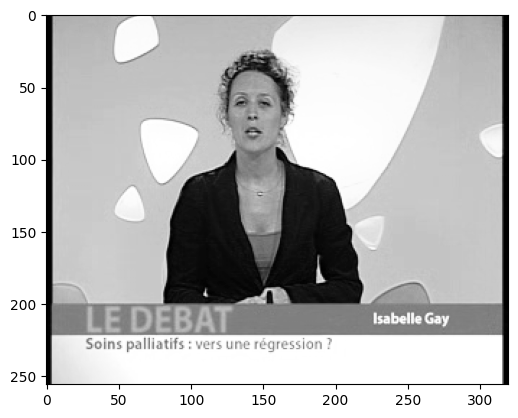

''

In [17]:
img_test_grey = cv2.cvtColor(img_test, cv2.COLOR_RGB2GRAY)
plt.imshow(img_test_grey, cmap = 'Greys_r')
plt.show()
text = pytesseract.image_to_string(img_test_grey, lang='fra')
text

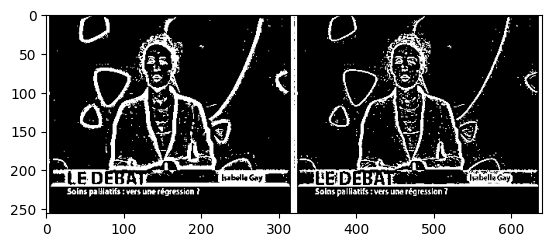

('', '')

In [18]:
seuillagenorm = cv2.adaptiveThreshold(img_test_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
seuillagegaussien =  cv2.adaptiveThreshold(img_test_grey, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

result = np.hstack([seuillagenorm, seuillagegaussien])

plt.imshow(result, cmap = 'Greys_r')
plt.show()

text1 = pytesseract.image_to_string(seuillagenorm, lang='fra')
text2 = pytesseract.image_to_string(seuillagegaussien, lang='fra')
text1,text2

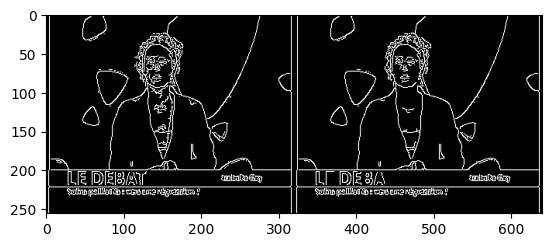

('CN #\nLEDéaaT ër |\n\np sOR ‘\n', 'd AN\nT DEZA m |\n\np sE ‘\n')

In [19]:
edge = cv2.Canny(img_test_grey, 30, 150)
edge1 = cv2.Canny(img_test_grey, 70, 200)

result = np.hstack([edge, edge1])
plt.imshow(result, cmap = 'Greys_r')
plt.show()

text1 = pytesseract.image_to_string(edge, lang='fra')
text2 = pytesseract.image_to_string(edge1, lang='fra')
text1,text2

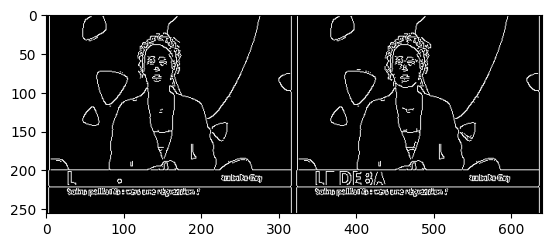

('', 'd AN\nT DEZA m |\n\np sE ‘\n')

In [20]:
edge = imutils.auto_canny(img_test_grey)
edge1 = cv2.Canny(img_test_grey, 70, 200)

result = np.hstack([edge, edge1])
plt.imshow(result, cmap = 'Greys_r')
plt.show()

text1 = pytesseract.image_to_string(edge, lang='fra')
text2 = pytesseract.image_to_string(edge1, lang='fra')
text1,text2

Extraction du bandeau uniquement

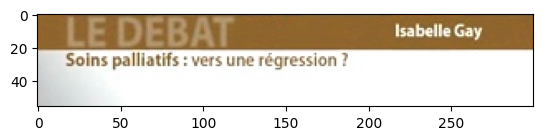

'Soins palliatifs: vers une régression\n'

In [21]:
bandeau = img_test[200:256, 10:310]
plt.imshow(bandeau)
plt.show()
text = pytesseract.image_to_string(bandeau, lang='fra')
text

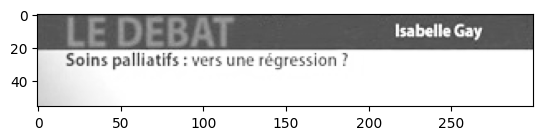

'Soins palliatifs: vers une régression\n'

In [22]:
bandeau_grey = cv2.cvtColor(bandeau, cv2.COLOR_RGB2GRAY)
plt.imshow(bandeau_grey, cmap = 'Greys_r')
plt.show()
text = pytesseract.image_to_string(bandeau_grey, lang='fra')
text

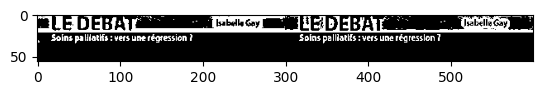

('*" Boins paiouis: versane régression\n', 'EEDI\n\n‘Solns palat\n\n')

In [23]:
seuillagenorm = cv2.adaptiveThreshold(bandeau_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
seuillagegaussien =  cv2.adaptiveThreshold(bandeau_grey, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

result = np.hstack([seuillagenorm, seuillagegaussien])

plt.imshow(result, cmap = 'Greys_r')
plt.show()

text1 = pytesseract.image_to_string(seuillagenorm, lang='fra')
text2 = pytesseract.image_to_string(seuillagegaussien, lang='fra')
text1,text2

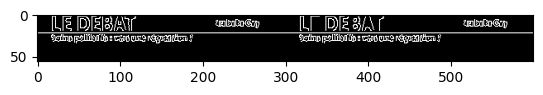

('LJ 1DIEJSA bl\n\np sOR\n', 'L DE BAT mbDa G\n\nO sC OF\n')

In [24]:
edge = cv2.Canny(bandeau_grey, 30, 150)
edge1 = cv2.Canny(bandeau_grey, 70, 200)

result = np.hstack([edge, edge1])
plt.imshow(result, cmap = 'Greys_r')
plt.show()

text1 = pytesseract.image_to_string(edge, lang='fra')
text2 = pytesseract.image_to_string(edge1, lang='fra')
text1,text2

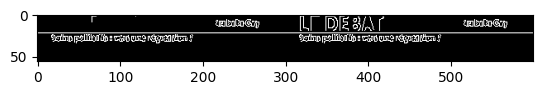

('mèaRo Ec\n\nSO E\n', 'L DE BAT mbDa G\n\nO sC OF\n')

In [25]:
edge = imutils.auto_canny(bandeau_grey)
edge1 = cv2.Canny(bandeau_grey, 70, 200)

result = np.hstack([edge, edge1])
plt.imshow(result, cmap = 'Greys_r')
plt.show()

text1 = pytesseract.image_to_string(edge, lang='fra')
text2 = pytesseract.image_to_string(edge1, lang='fra')
text1,text2

Nombre de boites: 14


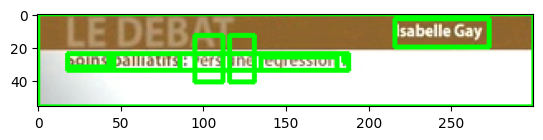

In [11]:
d = pytesseract.image_to_data(bandeau, output_type=Output.DICT)
 
NbBoites = len(d['level'])
print ("Nombre de boites: " + str(NbBoites))
for i in range(NbBoites):
    # Récupère les coordonnées de chaque boite
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    # Affiche un rectangle
    cv2.rectangle(bandeau, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.imshow(bandeau)
plt.show()

In [12]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
  
# thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
     
# erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)
# opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
# canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)
# skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated
# template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Cms c




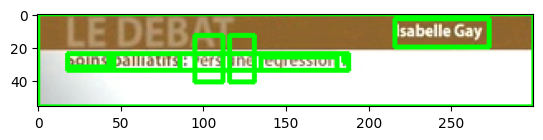

In [13]:
print(pytesseract.image_to_string(bandeau, lang='fra'))
plt.imshow(bandeau,'gray')

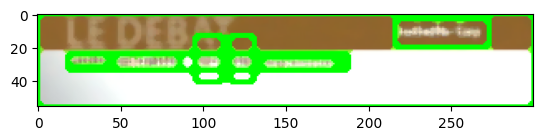

In [14]:
retouche3 = remove_noise(bandeau)
print(pytesseract.image_to_string(retouche3, lang='fra'))
plt.imshow(retouche3)

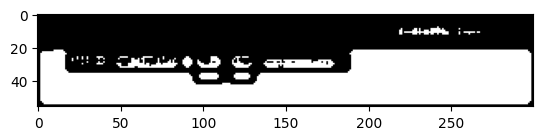

In [15]:
retouche4 = thresholding(grayscale(remove_noise(bandeau)))
print(pytesseract.image_to_string(retouche4, lang='fra'))
plt.imshow(retouche4,'gray')